In [1]:
import pandas as pd 
import numpy as np

In [2]:
RL_results = pd.read_csv("simulation_results_exit_walls.csv")

In [3]:
RL_results.head()

,test_type,room_width,room_height,n_exits,population,pct_staff,pct_adult,pct_patient,pct_child,time_steps,avg_evac_time,avg_death_time,num_evacuated,num_burned
0,fire_exits,500,500,1,50,0.15,0.283333,0.283333,0.283333,250,0.532727,NaN,22,0
1,fire_exits,500,500,1,50,0.15,0.283333,0.283333,0.283333,300,0.524095,NaN,21,0
2,fire_exits,500,500,1,50,0.15,0.283333,0.283333,0.283333,350,0.551882,NaN,17,0
3,fire_exits,500,500,1,50,0.15,0.283333,0.283333,0.283333,400,0.390895,NaN,19,0
4,fire_exits,500,500,1,50,0.15,0.283333,0.283333,0.283333,450,0.490654,NaN,26,0


In [4]:
RL_results.columns

Index(['test_type', 'room_width', 'room_height', 'n_exits', 'population',
       'pct_staff', 'pct_adult', 'pct_patient', 'pct_child', 'time_steps',
       'avg_evac_time', 'avg_death_time', 'num_evacuated', 'num_burned'],
      dtype='object')

In [5]:
# replace NaN with 0
RL_results = RL_results.fillna(0)
# replace inf with 0
RL_results = RL_results.replace([np.inf, -np.inf], 0)


In [6]:
RL_results.head()

,test_type,room_width,room_height,n_exits,population,pct_staff,pct_adult,pct_patient,pct_child,time_steps,avg_evac_time,avg_death_time,num_evacuated,num_burned
0,fire_exits,500,500,1,50,0.15,0.283333,0.283333,0.283333,250,0.532727,0.0,22,0
1,fire_exits,500,500,1,50,0.15,0.283333,0.283333,0.283333,300,0.524095,0.0,21,0
2,fire_exits,500,500,1,50,0.15,0.283333,0.283333,0.283333,350,0.551882,0.0,17,0
3,fire_exits,500,500,1,50,0.15,0.283333,0.283333,0.283333,400,0.390895,0.0,19,0
4,fire_exits,500,500,1,50,0.15,0.283333,0.283333,0.283333,450,0.490654,0.0,26,0


In [7]:
RL_results['avg_evacuation_rate'] = (RL_results['num_evacuated'] / RL_results['population']) * 100


In [8]:
RL_results.head()

,test_type,room_width,room_height,n_exits,population,pct_staff,pct_adult,pct_patient,pct_child,time_steps,avg_evac_time,avg_death_time,num_evacuated,num_burned,avg_evacuation_rate
0,fire_exits,500,500,1,50,0.15,0.283333,0.283333,0.283333,250,0.532727,0.0,22,0,44.0
1,fire_exits,500,500,1,50,0.15,0.283333,0.283333,0.283333,300,0.524095,0.0,21,0,42.0
2,fire_exits,500,500,1,50,0.15,0.283333,0.283333,0.283333,350,0.551882,0.0,17,0,34.0
3,fire_exits,500,500,1,50,0.15,0.283333,0.283333,0.283333,400,0.390895,0.0,19,0,38.0
4,fire_exits,500,500,1,50,0.15,0.283333,0.283333,0.283333,450,0.490654,0.0,26,0,52.0


In [9]:
RL_results.columns

Index(['test_type', 'room_width', 'room_height', 'n_exits', 'population',
       'pct_staff', 'pct_adult', 'pct_patient', 'pct_child', 'time_steps',
       'avg_evac_time', 'avg_death_time', 'num_evacuated', 'num_burned',
       'avg_evacuation_rate'],
      dtype='object')

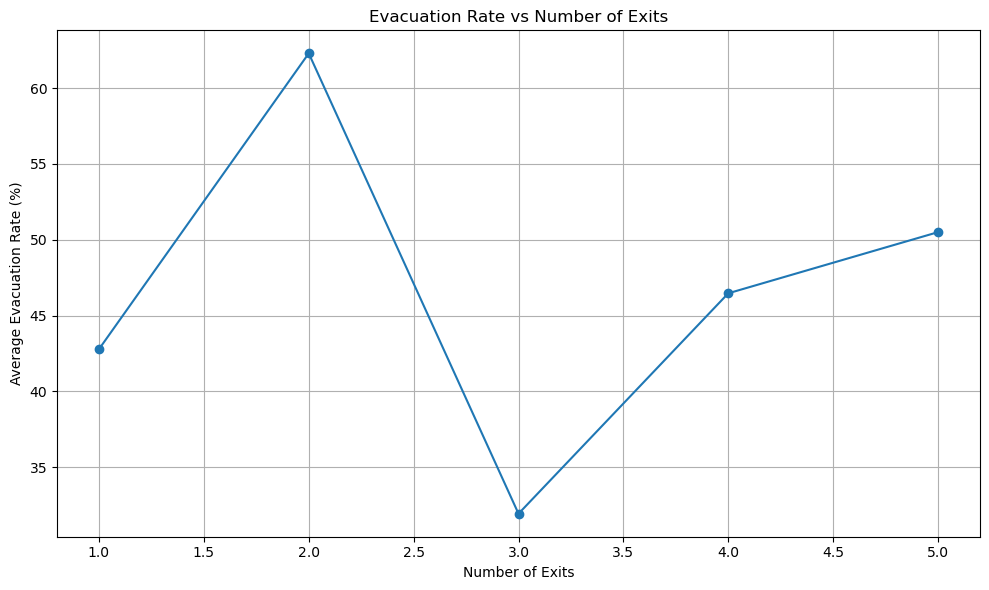

In [10]:
import matplotlib.pyplot as plt

grouped = RL_results.groupby('n_exits')['avg_evacuation_rate'].mean()

plt.figure(figsize=(10, 6))
plt.plot(grouped.index, grouped.values, marker='o')
plt.xlabel('Number of Exits')
plt.ylabel('Average Evacuation Rate (%)')
plt.title('Evacuation Rate vs Number of Exits')
plt.grid(True)
plt.tight_layout()
plt.show()


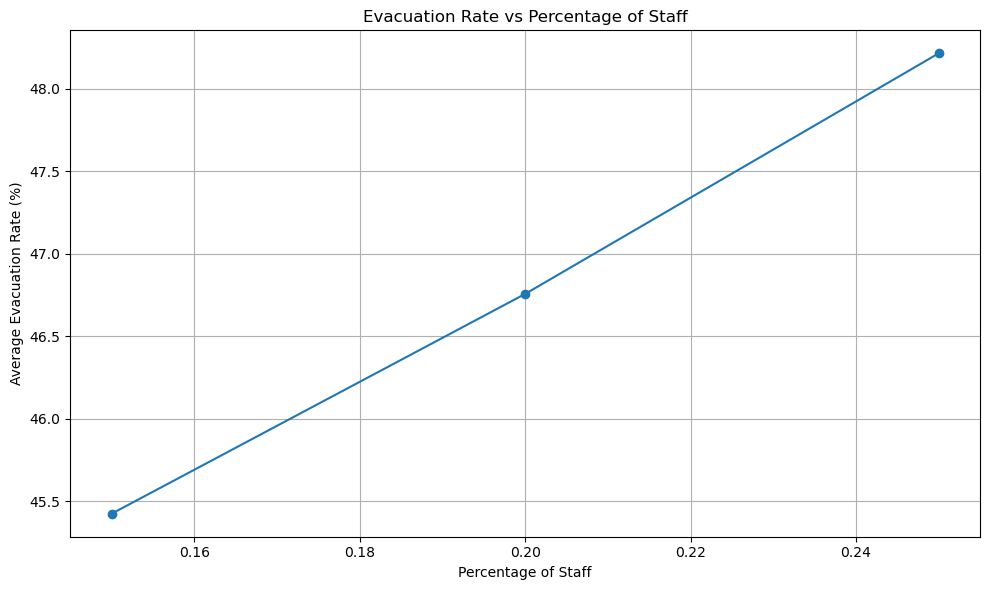

In [11]:
import matplotlib.pyplot as plt

grouped = RL_results.groupby('pct_staff')['avg_evacuation_rate'].mean()

plt.figure(figsize=(10, 6))
plt.plot(grouped.index, grouped.values, marker='o')
plt.xlabel('Percentage of Staff')
plt.ylabel('Average Evacuation Rate (%)')
plt.title('Evacuation Rate vs Percentage of Staff')
plt.grid(True)
plt.tight_layout()
plt.show()
